쿠팡이츠 배달단가 데이터 분석
========

## 개요
- 끝물인지, 제가 시작하자마자 쿠팡이츠 배달단가가 많이 내려가서 수입이 이전같지가 않습니다.
- 예전에는 이렇게 지역별로 단가가 공지되었는데, 실시간 상황에 따라 단가가 3300원에서 15000원으로 배달비가 할증처럼 붙으며, 콜이 배치가 됩니다.
- 동네별로 실시간 단가가 이렇게 주식처럼 오르락 내리락 하는데요.
- 한시간에 많이해야 2건 3건하는데, 시급이 만원이 조금 안되는겁니다.
- 그렇다고 하루종일 이거만 보고 있을수 없죠, 제 시급이 얼만데요. 만원 조금 안됩니다.


## 배달 단가 모니터링

- 저 대신 쿠팡이츠 단가를 모니터링 해줄 친구를 만들어봅시다.
- 이 친구가 하는일은, 1분마다 이렇게 한쪽에 화면에 나오는 숫자를 받아적는겁니다.
- 나중에 이렇게 로그파일 처럼 쌓인 지역구와 단가를 정리해서 그래프로 그리면
- 배달단가 분석을 할수 있습니다.

## 쿠팡이츠 배달 단가 분석 (사송동 위주)

- 쿠팡이츠 앱에서 배달 요청이 빈번한 곳을 이렇게 지도상에 히트맵과 overlap하여 보여줍니다.
- 제가 사는 동네 사송동을 중심으로 가까운 동네는 이렇게 7군데입니다. 
- 강남, 서초야 원래 핫한 동네고, 점심시간 분당구와 퇴근시간 수지구 야식시간 중원구도 꽤 볼만합니다.
- 제 위치에서 이 동네들 단가를 모니터링 해보겠습니다.






## 쿠팡이츠 배달단가 모니터.py

### 테스트

In [20]:
import pytesseract 

스크린샷 위치를 파악하기 위해 가상의 사각형의 시작점과 끝점 위치를 프린트

In [14]:
#왼쪽 맨윗점
pyautogui.position()

Point(x=485, y=559)

In [15]:
#오른쪽 맨아래점
pyautogui.position()

Point(x=485, y=559)

In [16]:
pos = (1245, 322, 1836, 978)    #iphone 6s
#pos = (1313, 295, 1824, 903)   #iphone Xs


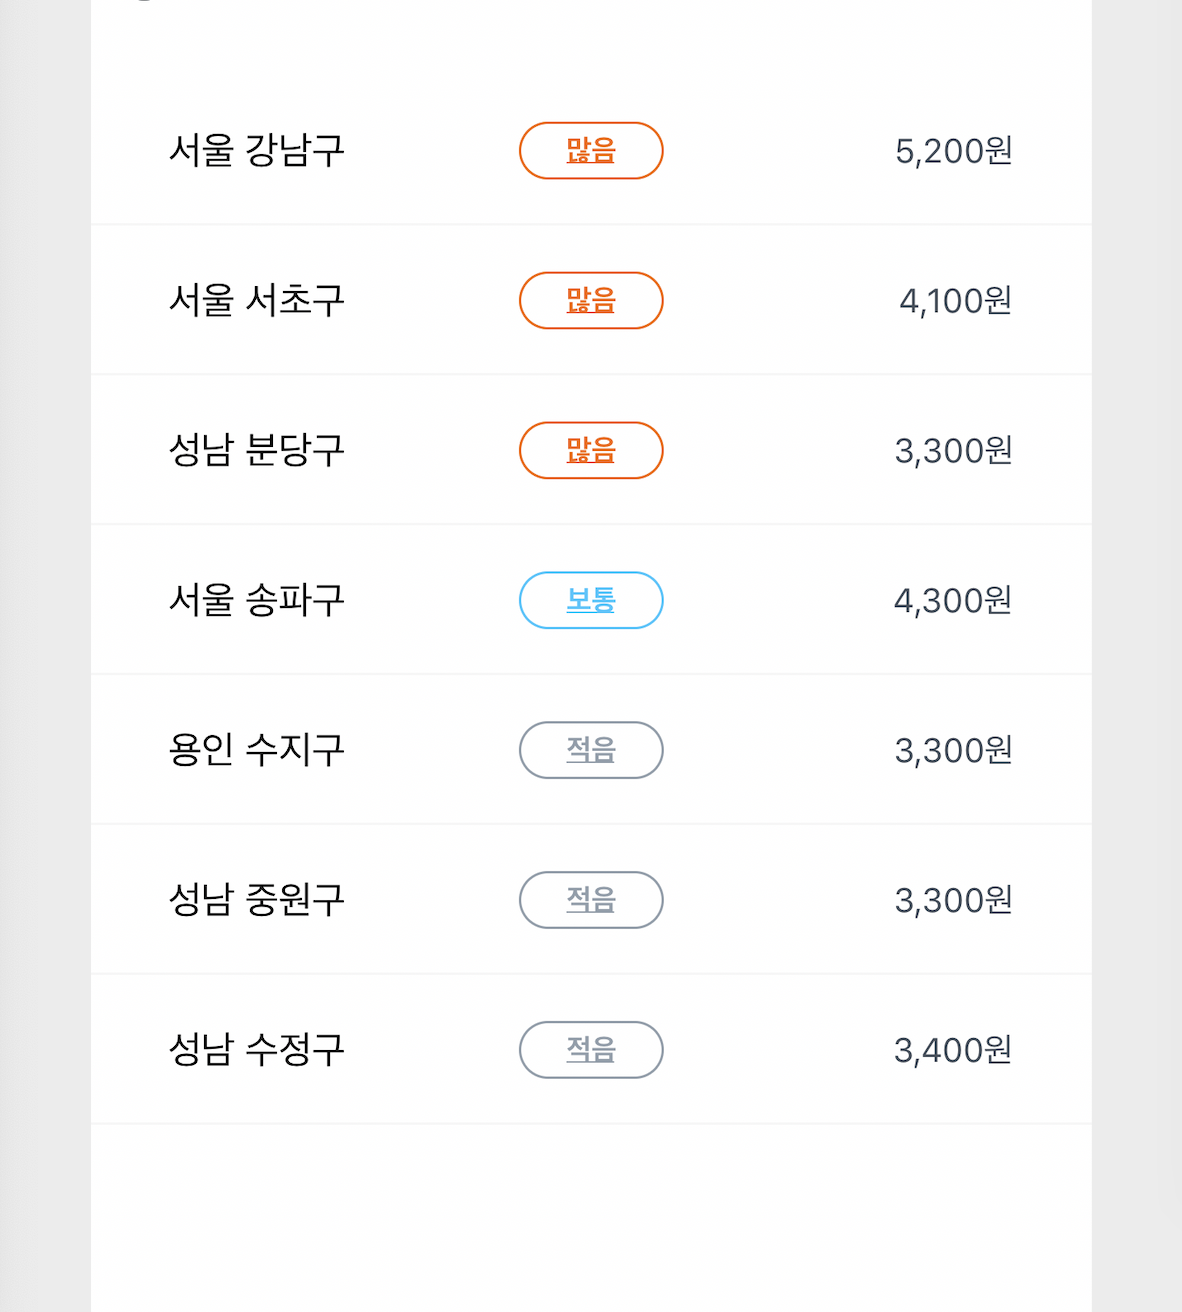

In [18]:
size_x, size_y = pos[2]-pos[0], pos[3]-pos[1]
#img = pyautogui.screenshot(region=(pos[0], pos[1], size_x, size_y))
# 맥북 레티나 디스플레이면 2를 곱해야함
img = pyautogui.screenshot(region=(pos[0]*2, pos[1]*2, size_x*2, size_y*2))
img

경험상 중간에 '적음', '보통', '많음' 은 테두리랑 밑줄 때문인지 잘 인식이 안됨. ~~단가랑 연동되는 속도도 더딤~~ 뭔가로 가리자. 빈 터미널 창을 길게 해서 가리면 매우 좋음.

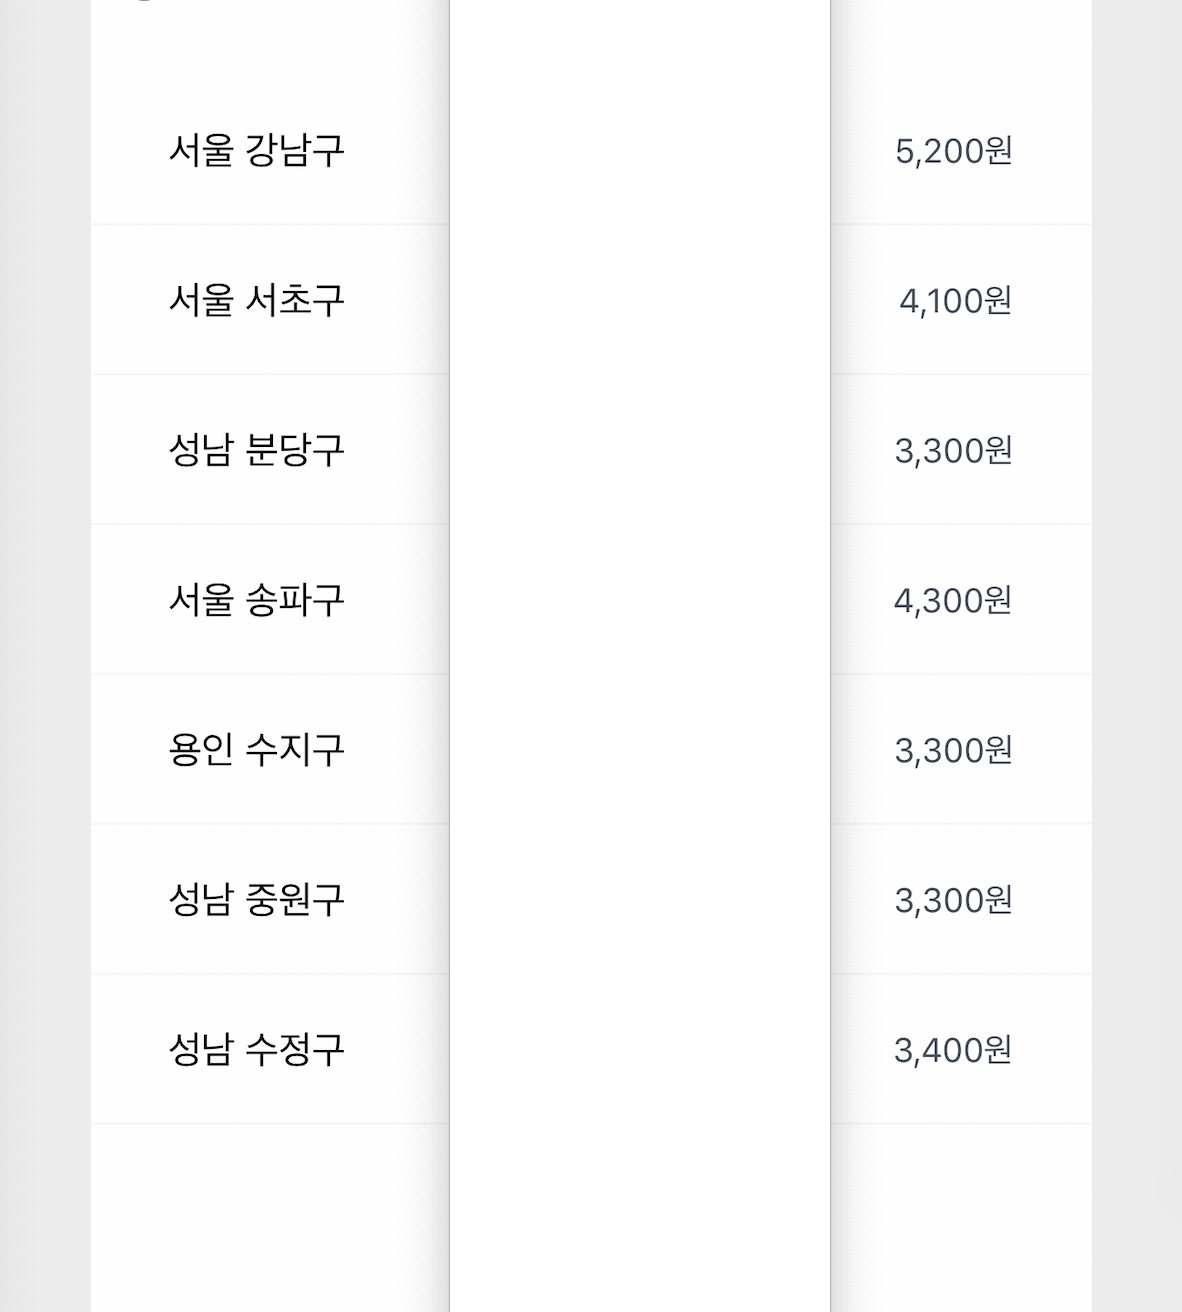

In [19]:
size_x, size_y = pos[2]-pos[0], pos[3]-pos[1]
#img = pyautogui.screenshot(region=(pos[0], pos[1], size_x, size_y))
# 맥북 레티나 디스플레이면 2를 곱해야함
img = pyautogui.screenshot(region=(pos[0]*2, pos[1]*2, size_x*2, size_y*2))
img

이제 이 이미지에서 글자인식을 해보자. 

In [21]:
import pyautogui
try: 
    from PIL import Image 
except ImportError: 
    import Image 
    
data = pytesseract.image_to_string(img, lang='kor')
print data

서 울 강 남 구

서 울 서 초 구

성 남 분 당 구

서 울 송 파 구

용 인 수 지 구

성 남 중 원 구

성 남 수 정 구

5,200 원

4,100 원

3,300 원

4,300 원

3,300 원

3,300 원

 

3,400 원



꽤 잘된다. 이제 1분에 한번씩 현재시간이랑 위에 값들을 받아적는 마크로를 만들어보자.

### 받아쓰기.py

In [22]:
import pyautogui, time
try: 
    from PIL import Image 
except ImportError: 
    import Image 
import pytesseract 

time_duration_minute = 18 * 60  # 일단 18시간으로 잡아둠 7AM - 1AM
time_sleep = 60                 # interval 1분에 한번

time_duration= time_duration_minute*60.
t0 = time.time()
t_elapsed = time.time()-t0

time.sleep(5)
data=[]
# while loop 
while t_elapsed<time_duration:      

    pyautogui.click()  # 화면보호기 방지
    
    # 스샷
    img = pyautogui.screenshot(region=(pos[0]*2, pos[1]*2, size_x*2, size_y*2))
    # 이미지 -> 변환
    data = pytesseract.image_to_string(img, lang='kor')
    
    # 저장 (아직안됨)
    current_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    print(current_time)
    print data
    
    t_elapsed = time.time()-t0
    time.sleep(time_sleep)
    pyautogui.click()
    


2020-10-24 01:38:20
서 울 강 남 구

서 울 서 초 구

성 남 분 당 구

서 울 송 파 구

용 인 수 지 구

성 남 중 원 구

성 남 수 정 구

5,200 원

4,100 원

3,300 원

4,300 원

3,300 원

3,300 원

 

3,400 원

2020-10-24 01:39:22
서 울 강 남 구

서 울 서 초 구

성 남 분 당 구

서 울 송 파 구

용 인 수 지 구

성 남 중 원 구

성 남 수 정 구

5,200 원

4,100 원

3,300 원

4,300 원

3,300 원

3,300 원

 

3,400 원

2020-10-24 01:40:23
서 울 강 남 구

서 울 서 초 구

성 남 분 당 구

서 울 송 파 구

용 인 수 지 구

성 남 중 원 구

성 남 수 정 구

5,200 원

4,100 원

3,300 원

4,300 원

3,300 원

3,300 원

 

3,400 원



KeyboardInterrupt: 

종료하려면 위에 창에서 Kernel - Interrupt 선택

파이썬에서 한글처리가 꽤 까다로우니, 윗 창에 나오는 output 들을 잘 복사해서 Excel에 붙여놓는다.

### 데이터 정리

- 엑셀에서 기본적인 data clean up을 수행한다
    - 맨 윗 쎌을 'out'으로 명명하고 데이터들 붙여넣기
    - 필터 써서 빈칸이나 다른 노이즈로 잘못 인식된 string uncheck
    - '0 원' 을 '0'으로 find and replace 
    - CSV UTF-8 로 저장
    
    

In [89]:
import pandas as pd
import numpy as np

data= pd.read_csv('data/sample_clean01.csv')
data[:32]

,out
0,2020/10/23 8:47
1,서 울 서 초 구
2,서 울 강 남 구
3,서 울 송 파 구
4,용 인 수 지 구
5,성 남 수 정 구
6,성 남 중 원 구
7,성 남 분 당 구
8,"4,600"
9,"4,600"


In [90]:
times = []
loc_rate = []
loc_rate_buffer = []
i=0
i_t=0

for log in data.out: 
    if '2020/' in log:
        loc_rate.append(loc_rate_buffer)
        times.append(log)
        loc_rate_buffer = []
    else:
        loc_rate_buffer.append(log)
    i+=1
    
print loc_rate[1:]

[['\xec\x84\x9c \xec\x9a\xb8 \xec\x84\x9c \xec\xb4\x88 \xea\xb5\xac', '\xec\x84\x9c \xec\x9a\xb8 \xea\xb0\x95 \xeb\x82\xa8 \xea\xb5\xac', '\xec\x84\x9c \xec\x9a\xb8 \xec\x86\xa1 \xed\x8c\x8c \xea\xb5\xac', '\xec\x9a\xa9 \xec\x9d\xb8 \xec\x88\x98 \xec\xa7\x80 \xea\xb5\xac', '\xec\x84\xb1 \xeb\x82\xa8 \xec\x88\x98 \xec\xa0\x95 \xea\xb5\xac', '\xec\x84\xb1 \xeb\x82\xa8 \xec\xa4\x91 \xec\x9b\x90 \xea\xb5\xac', '\xec\x84\xb1 \xeb\x82\xa8 \xeb\xb6\x84 \xeb\x8b\xb9 \xea\xb5\xac', '4,600', '4,600', '4,600', '4,600', '4,600', '4,600', '4,600'], ['\xec\x84\x9c \xec\x9a\xb8 \xec\x84\x9c \xec\xb4\x88 \xea\xb5\xac', '\xec\x84\x9c \xec\x9a\xb8 \xea\xb0\x95 \xeb\x82\xa8 \xea\xb5\xac', '\xec\x84\x9c \xec\x9a\xb8 \xec\x86\xa1 \xed\x8c\x8c \xea\xb5\xac', '\xec\x9a\xa9 \xec\x9d\xb8 \xec\x88\x98 \xec\xa7\x80 \xea\xb5\xac', '\xec\x84\xb1 \xeb\x82\xa8 \xec\x88\x98 \xec\xa0\x95 \xea\xb5\xac', '\xec\x84\xb1 \xeb\x82\xa8 \xec\xa4\x91 \xec\x9b\x90 \xea\xb5\xac', '\xec\x84\xb1 \xeb\x82\xa8 \xeb\xb6\x84 \xeb\x8b\

In [120]:
df1 = pd.DataFrame(times[1:], columns=['times'])
df2 = pd.DataFrame(loc_rate[1:])

In [121]:
# 쉼표 빈칸 등 없앰
df2 = df2.replace(to_replace=r' ', value='', regex=True).replace(to_replace=r',', value='', regex=True).replace(to_replace='None', value='', regex=True)



- 동네 순서가 일정하지 않아서 동네와 단가 string을 합치고 (예: col0+col7 서울서초구4600 ...) 가나다 순으로 sort예정

In [122]:
df2['a'] = df2[0]+df2[7].astype(str)
df2['b'] = df2[1]+df2[8].astype(str)
df2['c'] = df2[2]+df2[9].astype(str)
df2['d'] = df2[3]+df2[10].astype(str)
df2['e'] = df2[4]+df2[11].astype(str)
df2['f'] = df2[5]+df2[12].astype(str)
df2['g'] = df2[6]+df2[13].astype(str)

In [123]:
data2= df2[['a','b','c','d','e','f','g']]
data2.head()

,a,b,c,d,e,f,g
0,서울서초구4600,서울강남구4600,서울송파구4600,용인수지구4600,성남수정구4600,성남중원구4600,성남분당구4600
1,서울서초구4600,서울강남구4600,서울송파구4600,용인수지구4600,성남수정구4600,성남중원구4600,성남분당구4600
2,서울서초구4600,서울강남구4600,서울송파구4600,용인수지구4600,성남수정구4600,성남중원구4600,성남분당구4600
3,서울서초구4600,서울강남구4600,서울송파구4600,용인수지구4600,성남수정구4600,성남중원구4600,성남분당구4600
4,서울서초구4600,서울강남구4600,서울송파구4600,용인수지구4600,성남수정구4600,성남중원구4600,성남분당구4600


In [124]:
data3 = data2.apply(np.sort, axis=1, result_type='expand')
data3.head()

,0,1,2,3,4,5,6
0,서울강남구4600,서울서초구4600,서울송파구4600,성남분당구4600,성남수정구4600,성남중원구4600,용인수지구4600
1,서울강남구4600,서울서초구4600,서울송파구4600,성남분당구4600,성남수정구4600,성남중원구4600,용인수지구4600
2,서울강남구4600,서울서초구4600,서울송파구4600,성남분당구4600,성남수정구4600,성남중원구4600,용인수지구4600
3,서울강남구4600,서울서초구4600,서울송파구4600,성남분당구4600,성남수정구4600,성남중원구4600,용인수지구4600
4,서울강남구4600,서울서초구4600,서울송파구4600,성남분당구4600,성남수정구4600,성남중원구4600,용인수지구4600


In [125]:
data3['서울강남구'] =data3[0].str[15:].astype(int)
data3['서울서초구'] =data3[1].str[15:].astype(int)
data3['서울송파구'] =data3[2].str[15:].astype(int)
data3['성남분당구'] =data3[3].str[15:].astype(int)
data3['성남수정구'] =data3[4].str[15:].astype(int)
data3['성남중원구'] =data3[5].str[15:].astype(int)
data3['용인수지구'] =data3[6].str[15:].astype(int)
data3['datetime'] = pd.to_datetime(df1['time'])


ValueError: invalid literal for long() with base 10: '7400None'

In [127]:
a = data3[0].str[15:]

In [128]:
for i in a:
    print i

4600
4600
4600
4600
4600
4600
4600
4600
4600
4600
4600
4600
4600
4600
4500
4400
4300
4200
4100
4000
3900
3800
3700
3600
3500
3500
3500
3500
3500
3500
3500
3600
3600
3700
3900
3900
4100
4200
4300
4400
4500
4500
4500
4500
4500
4500
4500
4500
4500
4400
4300
4200
4100
4000
3900
3800
3700
3600
3500
3400
3300
3300
3300
3300
3300
3300
3300
3300
3300
3300
3300
3300
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5100
5200
5200
5200
5200
5200
5200
5300
5400
5500
5600
5700
5700
5800
5900
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
72
73
74
7500
76
7700
7800
7900
7900
7900
7900
7900
7900
79
7900
7900
79
7900
7900
7900
7800
78
7800
7800
7800
7800
7800
7700
76
75
7200
690




### 필요한 설치파일
- 파이썬 패키지인 Anaconda를 설치합니다. 설치법은 뭐 다운받고 클릭클릭하면 됩니다..
    - https://www.anaconda.com/products/individual
- Jupyter Notebook 을 실행합니다.
- 파이썬은 이렇게 생겼습니다.
- 필요한 패키지를 설치합니다.
    - **PyAutoGUI** : 파이썬을 활용해서 자동화 마크로를 만들때 필요한 모듈입니다. 
        - 설치하려면 아래 주문을 외우세요.
    
    ```
    $ conda install -c conda-forge pyautogui
    ```
    
    - **Tesseract** : 구글에서 만든 오픈소스 OCR 프로그램입니다. 
        - optical character recognition, 이미지에서 문자를 추출하는 기술이고 설치법은 여러방법이 있습니다만 저는 MacPort를 사용했습니다.
        
    ```
    $ sudo port install tesseract tesseract-kor

    ```
    - **pytesseract** : 파이썬에서 Tesseract를 쉽게 사용하게 해주는 모듈입니다. 
        - 설치법은,
    
    ```
    $ conda install -c conda-forge pytesseract
    ```
   
   
 
 
 ## Reference
 - https://www.anaconda.com/products/individual
 - https://github.com/asweigart/pyautogui
 - https://github.com/tesseract-ocr/tesseract
 - 